In [267]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [268]:
def pspl_model(mjd, f, u0, tE, t0):
    x = mjd
    t = x - np.min(x) - (np.max(x) - np.min(x))/2 # reformat the time to have the middle at 0
    u = (u0**2 + ((t - t0)/tE)**2)**0.5 # find u(t)
    A = (u**2 + 2)/(u*(u**2 + 4)**0.5) # find A(t)
    
    return mjd, A*f, A

Text(0.5, 1.0, 'y = sin(x) with Random Sampling')

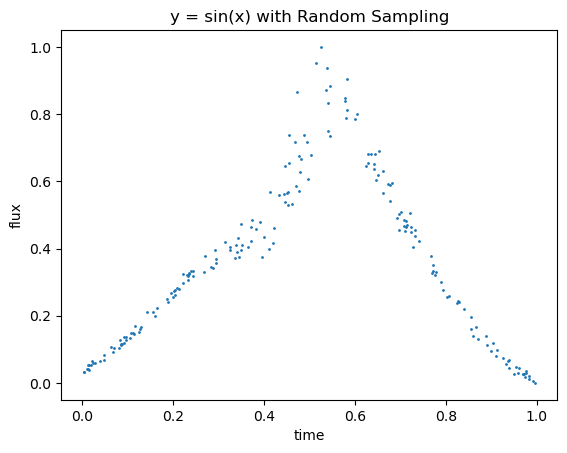

In [291]:
u0 = 0.1
tE = 1
t0 = 0
p = 0.1

x = np.random.uniform(0, 1, 200)
y = np.zeros(len(x))
#y = np.random.uniform(0, 1, len(x))
#x = np.linspace(0, 1, 500)

#Y = X
#y = x + np.random.uniform(-1*p, 1*p, len(x))

#SINE WAVE
y = 0.6*np.sin(10*x) + np.random.uniform(-1*p, 1*p, len(x))
# y = y - min(y)
# y = y/max(y)

#PSPL MICROLENSING MODEL
_, f, A = pspl_model(x, y + 1, u0, tE, t0) + np.random.uniform(-1*p, 1*p, len(x))
y = f*A


#UNIFORM RANDOM NOISE
# y = np.random.uniform(0, 1, len(x))
y = y - min(y)
y = y/max(y)


plt.scatter(x, y, s=1)
plt.xlabel("time")
plt.ylabel("flux")
plt.title("y = sin(x) with Random Sampling")

In [292]:
# dfbyf = []
# dt = []
# for counti, i in enumerate(y[:]):
#         for countj, j in enumerate(y[counti+1:]):
#             countj = counti+1+countj
#             if (x[counti] - x[countj])==0:
#                 continue
#             else:
#                 dfbyf.append((j - i)/max(y))
#                 dt.append((x[counti] - x[countj]))
# dt, dfbyf = zip(*sorted(zip(dt, dfbyf)))
# dt, dfbyf = np.array(dt), np.array(dfbyf)

dfbyf = []
dt = []
for counti, i in enumerate(y[:]):
        for countj, j in enumerate(y[counti+1:]):
            countj = counti+1+countj
            if np.abs(x[counti] - x[countj])==0:
                continue
            else:
                dfbyf.append(np.abs(j - i)/max(y))
                dt.append(np.abs(x[counti] - x[countj]))
dt, dfbyf = zip(*sorted(zip(dt, dfbyf)))
dt, dfbyf = np.array(dt), np.array(dfbyf)

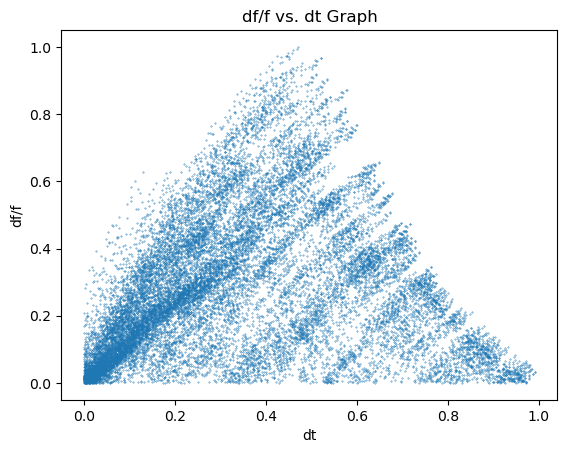

In [293]:
plt.scatter(dt, dfbyf, s = 0.1)
plt.xlabel("dt")
plt.ylabel("df/f")
plt.title("df/f vs. dt Graph")
plt.show()

Text(0.5, 1.0, 'Log df/f vs. dt Plot')

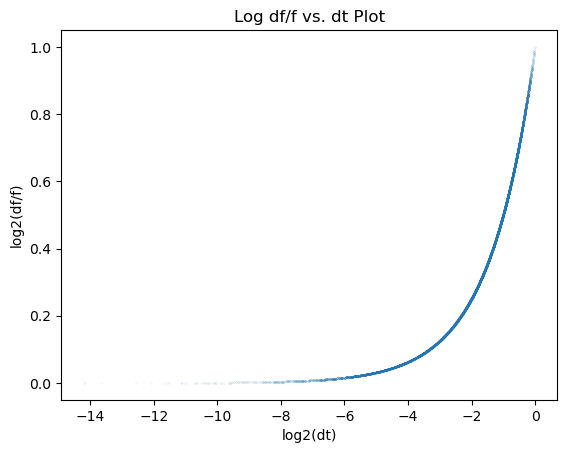

In [213]:
plt.plot(np.log2(dt), dfbyf, ".", markersize=0.1)
plt.xlabel("log2(dt)")
plt.ylabel("log2(df/f)")
plt.title("Log df/f vs. dt Plot")

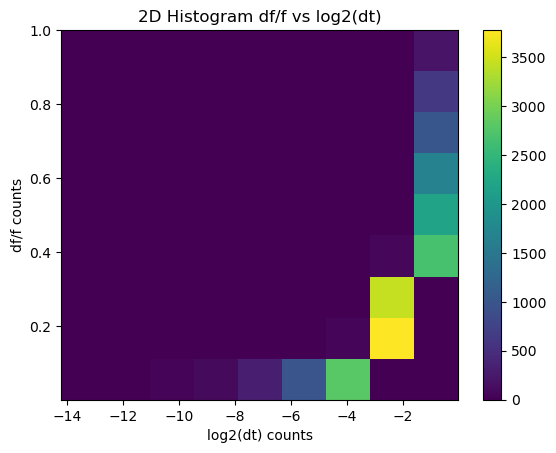

In [214]:
_ = plt.hist2d(np.log2(dt), dfbyf, bins = [9, 9])
plt.colorbar()
plt.xlabel("log2(dt) counts")
plt.ylabel("df/f counts")
plt.title("2D Histogram df/f vs log2(dt)")
plt.show()

In [215]:
_[0]

array([[3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [3.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [1.020e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [3.170e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [9.740e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [2.794e+03, 4.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 3.774e+03, 3.443e+03, 5.900e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 2.681e+03, 2.188e+03, 1.653e+03

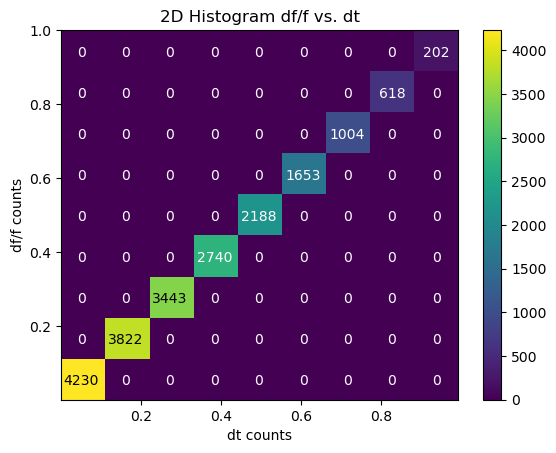

In [216]:
_ = plt.hist2d(dt, dfbyf, bins = [9, 9])

for y in range(_[0].shape[0]):
    for x in range(_[0].shape[1]):
        if round(_[0][y, x], 2)>0.75*np.max(_[0]):
            color="black"
        else:
            color="white"
        plt.text(x/_[0].shape[1] + 0.05, y/_[0].shape[0] + 0.05, '%.f' % round(_[0][y, x]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 color=color)
plt.colorbar()
plt.xlabel("dt counts")
plt.ylabel("df/f counts")
plt.title("2D Histogram df/f vs. dt")
plt.show()

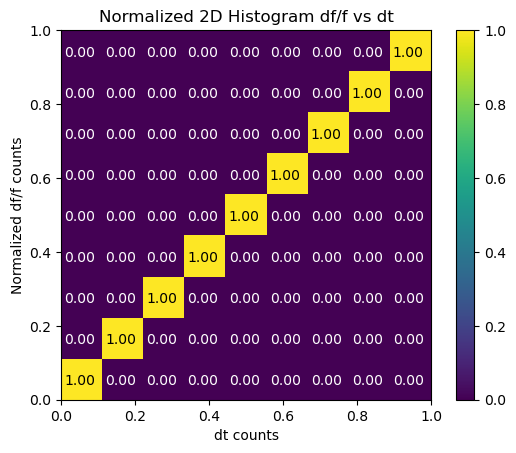

In [217]:
_[0][0,:]

from copy import deepcopy

d2 = deepcopy(_)
# d2[0][0,:]

for i in range(len(d2[0])):
    d2[0][:,i] = d2[0][:,i]/max(d2[0][:,i])

plt.imshow(np.flipud(d2[0]), extent=[0,1,0, 1])
for y in range(d2[0].shape[0]):
    for x in range(d2[0].shape[1]):
        if round(d2[0][y, x], 2)>0.75:
            color="black"
        else:
            color="white"
        plt.text(x/d2[0].shape[1] + 0.05, y/d2[0].shape[0] + 0.05, '%.2f' % round(d2[0][y, x], 2),
                 horizontalalignment='center',
                 verticalalignment='center',
                 color=color)

plt.xlabel("dt counts")
plt.ylabel("Normalized df/f counts")
plt.title("Normalized 2D Histogram df/f vs dt")
plt.colorbar()

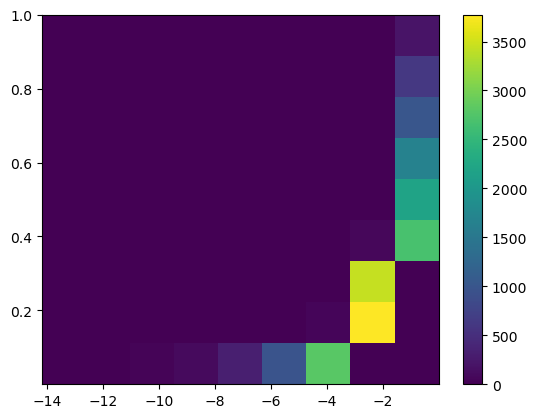

In [218]:
_ = plt.hist2d(np.log2(dt), dfbyf, bins = [9, 9])
plt.colorbar()

In [219]:
#help(plt.imshow)

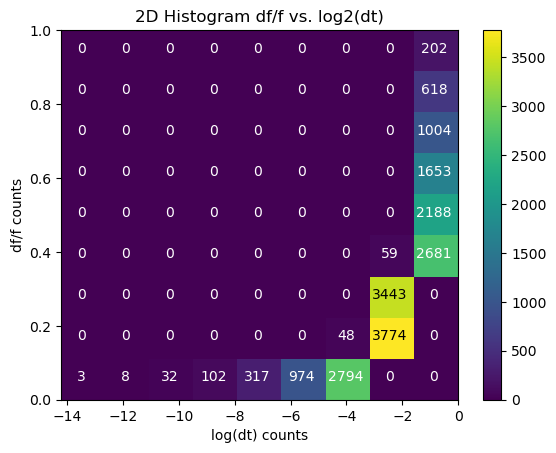

In [220]:
plt.imshow(np.rot90(_[0]), extent=[np.min(np.log2(dt)),0,0,1], aspect ="auto")
for y in range(_[0].shape[0]):
    for x in range(_[0].shape[1]):
        if round(np.rot90(_[0])[y, x], 2)>0.75*np.max(_[0]):
            color="black"
        else:
            color="white"
        plt.text(np.min(np.log2(dt)) - np.min(np.log2(dt))*(x/_[0].shape[1] + 0.05), 1 - (y/_[0].shape[0] + 0.05), '%.f' % round(np.rot90(_[0])[y, x]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 color=color)
plt.colorbar()
plt.xlabel("log(dt) counts")
plt.ylabel("df/f counts")
plt.title("2D Histogram df/f vs. log2(dt)")
plt.show()

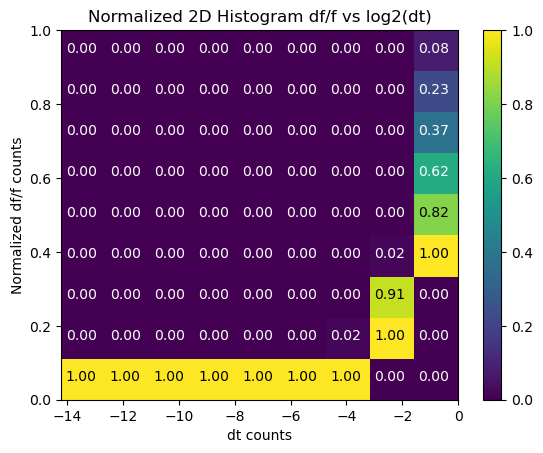

In [221]:
from copy import deepcopy

d2 = np.rot90(deepcopy(_)[0])
# d2[0][0,:]

for i in range(len(d2)):
    d2[:,i] = d2[:,i]/max(d2[:,i])

plt.imshow((d2), extent=[np.min(np.log2(dt)),0,0,1], aspect ="auto")
for y in range(d2.shape[0]):
    for x in range(d2.shape[1]):
        if round(d2[y, x], 2)>0.75:
            color="black"
        else:
            color="white"
        plt.text(np.min(np.log2(dt)) - np.min(np.log2(dt))*(x/d2.shape[1] + 0.05),1 - (y/d2.shape[0] + 0.05), '%.2f' % round(d2[y, x], 2),
                 horizontalalignment='center',
                 verticalalignment='center',
                 color=color)

plt.xlabel("dt counts")
plt.ylabel("Normalized df/f counts")
plt.title("Normalized 2D Histogram df/f vs log2(dt)")
plt.colorbar()

In [101]:
_[0][0,:]

from copy import deepcopy

d2 = deepcopy(_)
# d2[0][0,:]

for i in range(len(d2[0])):
    d2[0][:,i] = d2[0][:,i]/max(d2[0][:,i])

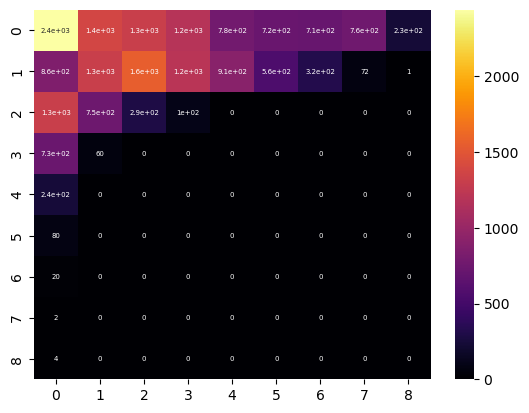

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

labels = np.flipud(_[0])
ax = sns.heatmap(np.flipud(_[0]), cmap="inferno", annot=np.round(labels), annot_kws={'fontsize': 5})
plt.show()

In [226]:
_[0][0,:], _[0][:,0]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1.000e+00, 3.000e+00, 1.400e+01, 4.100e+01, 1.660e+02, 6.840e+02,
        1.428e+03, 7.420e+02, 2.719e+03]))

In [227]:
# plt.imshow(np.flipud(_[0]))
# plt.colorbar()
# _[0]

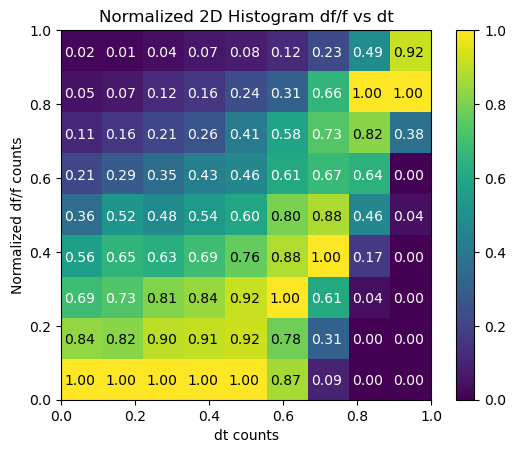

In [242]:
plt.imshow(np.flipud(d2[0]), extent=[0,1,0,1])
for y in range(d2[0].shape[0]):
    for x in range(d2[0].shape[1]):
        if round(d2[0][y, x], 2)>0.75:
            color="black"
        else:
            color="white"
        plt.text(x/d2[0].shape[1] + 0.05, y/d2[0].shape[0] + 0.05, '%.2f' % round(d2[0][y, x], 2),
                 horizontalalignment='center',
                 verticalalignment='center',
                 color=color)

plt.xlabel("dt counts")
plt.ylabel("Normalized df/f counts")
plt.title("Normalized 2D Histogram df/f vs dt")
plt.colorbar()

In [208]:
np.flipud(d2[0])[:,0], np.flipud(d2[0])[0,:]

(array([0.01659751, 0.04813278, 0.1120332 , 0.21327801, 0.35767635,
        0.56431535, 0.69128631, 0.83900415, 1.        ]),
 array([0.01659751, 0.01491054, 0.03816794, 0.06621392, 0.08010336,
        0.12173913, 0.23188406, 0.48809524, 0.91666667]))

In [209]:
np.flipud(_[0])[:,0], np.flipud(_[0])[0,:]

(array([  20.,   58.,  135.,  257.,  431.,  680.,  833., 1011., 1205.]),
 array([20., 15., 30., 39., 31., 28., 32., 41., 22.]))

In [210]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or 